In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

### 1
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [3]:
n = 100
v1, v2 = 75, 67

In [4]:
h0 = stats.binom(n, 0.75)

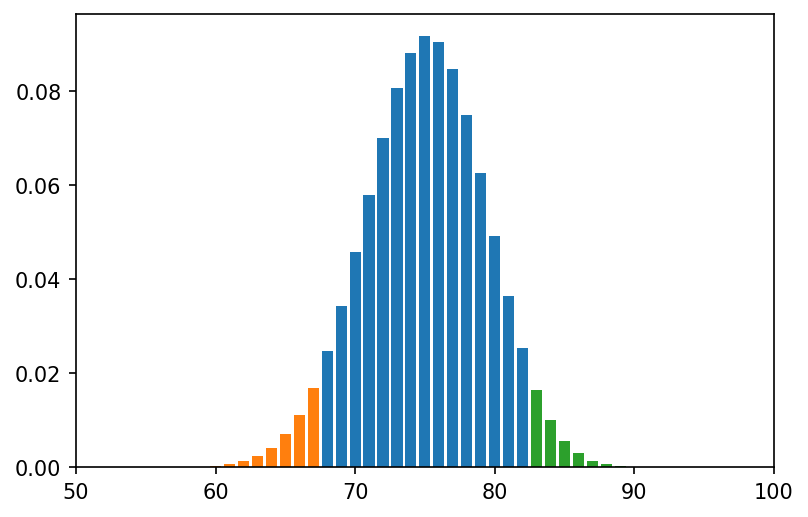

In [5]:
plt.figure(dpi=150)
plt.bar(range(1, 101), h0.pmf(range(1, 101)))
plt.bar(range(1, 68), h0.pmf(range(1, 68)))
plt.bar(range(75 + 75 - 67, 101), h0.pmf(range(75 + 75 - 67, 101)))
plt.xlim(50, 100);

In [6]:
less = stats.binom_test(67, 100, 0.75, "less")
great = stats.binom_test(75 + 75 - 67, 100, 0.75, "greater")
other = stats.binom_test(67, 100, 0.75)
other == less+great

True

In [7]:
round(other, 4)

0.0822

---
---
### 2
Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.


- Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников + 


- Сеть известна низкими зарплатами и большой текучкой кадров, поэтому туда идут работать люди, не склонные переживать о сохранении рабочего места +


- Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным + 


- Условия работы в этой сети лучше, чем в среднем + 

In [8]:
print(stats.binom_test(22, 50, 0.75))

3.4831478978300243e-06


---
---
### 3
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [9]:
df = pd.read_csv("pines.txt", sep="\t")
bins = np.linspace(0, 200, 6)
bins

array([  0.,  40.,  80., 120., 160., 200.])

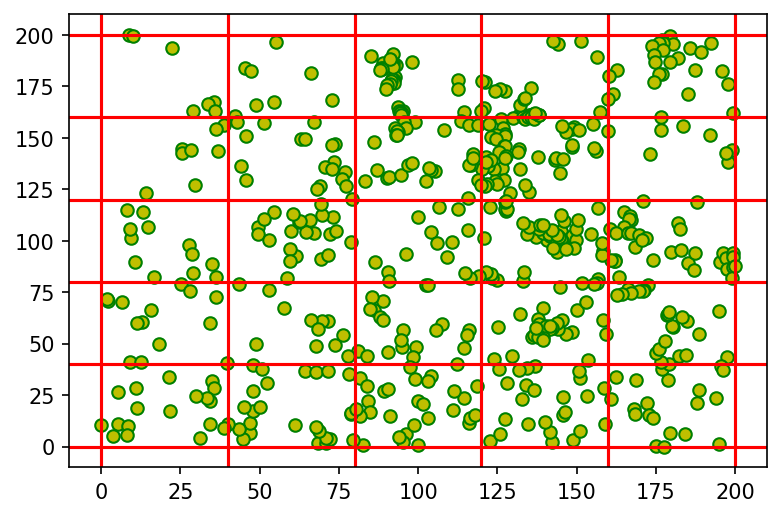

In [10]:
plt.figure(dpi=150)
plt.scatter(df.we, df.sn,c="y", edgecolors="g")
for val in bins:
    plt.axvline(val, color='r')
    plt.axhline(val, color="r")

In [11]:
res = stats.binned_statistic_2d(df.we, df.sn, None, "count", bins=[bins, bins])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки

In [12]:
# зачем тут binned_scatistic ?
mean = df.shape[0] / 25 
res.statistic.mean(), mean 

(23.36, 23.36)

In [13]:
(res.statistic/mean)

array([[0.77054795, 0.59931507, 0.51369863, 0.34246575, 0.29965753],
       [1.1130137 , 0.51369863, 1.02739726, 0.81335616, 0.34246575],
       [1.24143836, 0.94178082, 0.64212329, 1.32705479, 1.58390411],
       [1.07020548, 1.45547945, 2.14041096, 2.14041096, 1.15582192],
       [0.85616438, 1.07020548, 1.58390411, 0.29965753, 1.15582192]])

---
---
### 4
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).


In [14]:
stats.chisquare(res.statistic.flatten())

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [16]:
round(
    stats.chisquare(
        res.statistic.flatten(),  # то что в данных
        np.ones(25) * mean,  # равномерный случай, опционально
    )[0], 
    2
)

150.59

---
---
### 5
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с $25-1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K-1$, где $K$ — количество интервалов).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?


- Достигаемый уровень значимости больше 0.05, гипотеза равномерности не отвергается.


- **Достигаемый уровень значимости меньше 0.05, гипотеза равномерности отвергается.**